## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = pymaceuticals_df["Mouse ID"].value_counts()
number_of_mice = len(number_of_mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = pymaceuticals_df.loc[pymaceuticals_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicatemice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemousedata = pymaceuticals_df[pymaceuticals_df.duplicated(["Mouse ID", "Timepoint"])]
duplicatemousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_clean_df = pymaceuticals_df.drop(pymaceuticals_df[pymaceuticals_df["Mouse ID"].isin(duplicatemice)].index.tolist())


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanmicecount = pymaceuticals_clean_df["Mouse ID"].value_counts()
cleanmicecount = len(cleanmicecount)
cleanmicecount

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimenmeans = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

regimenmedians = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

regimenmedians = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

regimenvariance = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(ddof=1)

regimenstds = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(ddof=1)

regimensems = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(ddof=1)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summarytable_1 = pd.DataFrame({"Mean": regimenmeans, "Median":regimenmedians, "Variance":regimenvariance, "STD": regimenstds, "SEM": regimensems})

summarytable_1


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarytable_2 = pymaceuticals_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
# This method produces everything in a single groupby function

summarytable_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

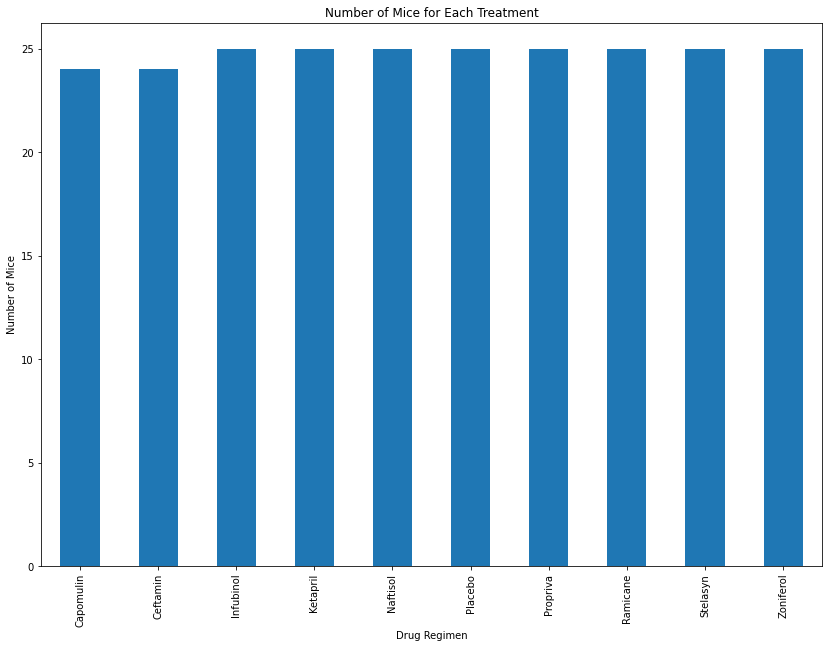

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
micedata = pymaceuticals_clean_df.groupby("Drug Regimen")["Mouse ID"].nunique().sort_values()
miceplot = micedata.plot(kind="bar", figsize=(14, 10), title = "Number of Mice for Each Treatment")
label = summarytable_1.index

miceplot.set_xticklabels(labels = label)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


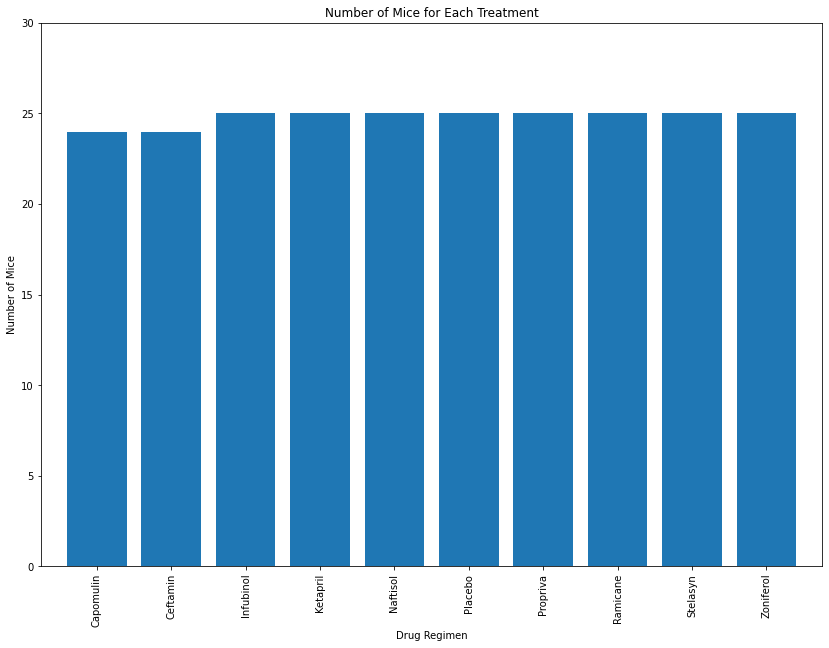

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(micedata))
fig1, axis1 = plt.subplots(figsize=(14, 10))
tick_locations = [value for value in x_axis]


numbermice_list = (pymaceuticals_clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique().sort_values()).tolist()

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(numbermice_list) + 5)

plt.bar(x_axis, numbermice_list, align="center")
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Female versus Male mice distribution')

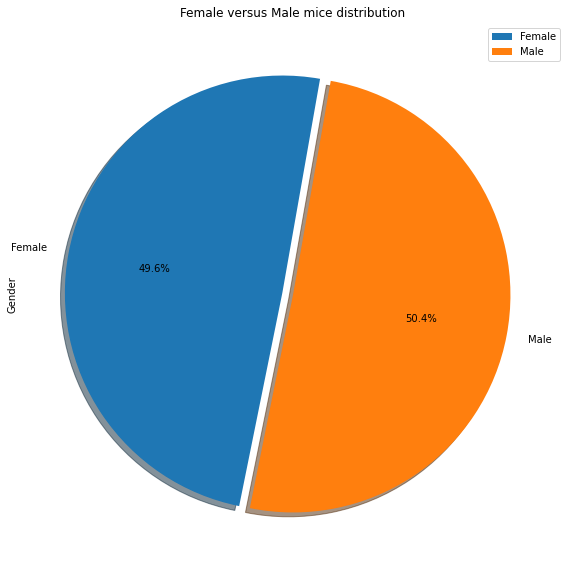

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdist = pymaceuticals_clean_df.groupby(["Mouse ID", "Sex"])
genderdist_df = pd.DataFrame(genderdist.size())

numbergender = pd.DataFrame(genderdist_df.groupby(["Sex"]).count())
numbergender.columns = ["Gender"]

explode = (0.05, 0)
numbergender.plot.pie(y='Gender',figsize=(14,10), explode = explode, startangle= 80, shadow = True, autopct="%1.1f%%")
plt.title("Female versus Male mice distribution")

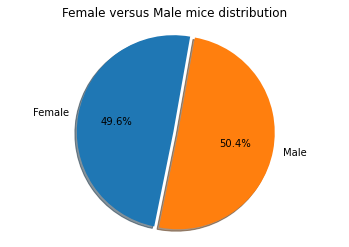

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# I looked at numbergender that I calculated above to give me the sizes

genders = ["Female", "Male"]

sizes = [123, 125]

explode = [0.05, 0]

plt.title("Female versus Male mice distribution")
plt.pie(sizes, explode=explode, labels=genders, autopct="%1.1f%%", shadow=True, startangle=80)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
capomulin = (pymaceuticals_clean_df.loc[pymaceuticals_clean_df["Drug Regimen"] == "Capomulin"]).groupby(["Mouse ID"])["Timepoint"].max()
capomulinfinal = pd.DataFrame(capomulin)

ramicane = (pymaceuticals_clean_df.loc[pymaceuticals_clean_df["Drug Regimen"] == "Ramicane"]).groupby(["Mouse ID"])["Timepoint"].max()
ramicanefinal = pd.DataFrame(ramicane)

infubinol = (pymaceuticals_clean_df.loc[pymaceuticals_clean_df["Drug Regimen"] == "Infubinol"]).groupby(["Mouse ID"])["Timepoint"].max()
infubinolfinal = pd.DataFrame(infubinol)

ceftamin = (pymaceuticals_clean_df.loc[pymaceuticals_clean_df["Drug Regimen"] == "Ceftamin"]).groupby(["Mouse ID"])["Timepoint"].max()
ceftaminfinal = pd.DataFrame(ceftamin)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulinmerged = pd.merge(capomulinfinal, pymaceuticals_clean_df, on=("Mouse ID","Timepoint"),how="left")


ramicanemerged = pd.merge(ramicanefinal, pymaceuticals_clean_df, on=("Mouse ID","Timepoint"),how="left")


infubinolmerged = pd.merge(infubinolfinal, pymaceuticals_clean_df, on=("Mouse ID","Timepoint"),how="left")


ceftaminmerged = pd.merge(ceftaminfinal, pymaceuticals_clean_df, on=("Mouse ID","Timepoint"),how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers and determine outliers using upper and lower bounds.
# Capomulin
capquartiles = capomulinmerged["Tumor Volume (mm3)"].quantile([.25,.5,.75])
caplowerq = capquartiles[0.25]
capupperq = capquartiles[0.75]
capiqr = capupperq-caplowerq

print(f"The lower quartile of Capomulin is: {caplowerq}")
print(f"The upper quartile of Capomulin is: {capupperq}")
print(f"The interquartile range of Capomulin is: {capiqr}")
print(f"The median of Capomulin is: {capquartiles[0.5]} ")

cap_lower_bound = caplowerq - (1.5*capiqr)
cap_upper_bound = capupperq + (1.5*capiqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")
                          
cap_outliers = capomulinmerged.loc[(capomulinmerged["Tumor Volume (mm3)"] < cap_lower_bound) | (capomulinmerged["Tumor Volume (mm3)"] > cap_upper_bound)]
cap_outliers 

# Ramicane
ramquartiles = ramicanemerged["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramlowerq = ramquartiles[0.25]
ramupperq = ramquartiles[0.75]
ramiqr = ramupperq-ramlowerq

print(f"The lower quartile of Ramicane is: {ramlowerq}")
print(f"The upper quartile of Ramicane is: {ramupperq}")
print(f"The interquartile range of Ramicane is: {ramiqr}")
print(f"The median of Ramicane is: {ramquartiles[0.5]} ")

ram_lower_bound = ramlowerq - (1.5*ramiqr)
ram_upper_bound = ramupperq + (1.5*ramiqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")
                          
ram_outliers = ramicanemerged.loc[(ramicanemerged["Tumor Volume (mm3)"] < ram_lower_bound) | (ramicanemerged["Tumor Volume (mm3)"] > ram_upper_bound)]
ram_outliers

# Infubinol
infquartiles = infubinolmerged["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inflowerq = infquartiles[0.25]
infupperq = infquartiles[0.75]
infiqr = infupperq-inflowerq

print(f"The lower quartile of Infubinol is: {inflowerq}")
print(f"The upper quartile of Infubinol is: {infupperq}")
print(f"The interquartile range of Infubinol is: {infiqr}")
print(f"The median of Infubinol is: {infquartiles[0.5]} ")

inf_lower_bound = inflowerq - (1.5*infiqr)
inf_upper_bound = infupperq + (1.5*infiqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")
                          
inf_outliers = infubinolmerged.loc[(infubinolmerged["Tumor Volume (mm3)"] < inf_lower_bound) | (infubinolmerged["Tumor Volume (mm3)"] > inf_upper_bound)]
inf_outliers
    
# Ceftamin
cefquartiles = ceftaminmerged["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceflowerq = cefquartiles[0.25]
cefupperq = cefquartiles[0.75]
cefiqr = cefupperq-ceflowerq

print(f"The lower quartile of Ceftamin is: {ceflowerq}")
print(f"The upper quartile of Ceftamin is: {cefupperq}")
print(f"The interquartile range of Ceftamin is: {cefiqr}")
print(f"The median of Ceftamin is: {cefquartiles[0.5]} ")

cef_lower_bound = ceflowerq - (1.5*cefiqr)
cef_upper_bound = cefupperq + (1.5*cefiqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")
                          
cef_outliers = ceftaminmerged.loc[(ceftaminmerged["Tumor Volume (mm3)"] < cef_lower_bound) | (ceftaminmerged["Tumor Volume (mm3)"] > cef_upper_bound)]
    
# Locate the rows which contain mice on each drug and get the tumor volumes
captumorvol = capomulinmerged["Tumor Volume (mm3)"]

ramtumorvol = ramicanemerged["Tumor Volume (mm3)"]

inftumorvol = infubinolmerged["Tumor Volume (mm3)"]

ceftumorvol = ceftaminmerged["Tumor Volume (mm3)"]
    
# add list to hold data we need to plot
tumorvols = [captumorvol, ramtumorvol, inftumorvol,ceftumorvol] 
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of

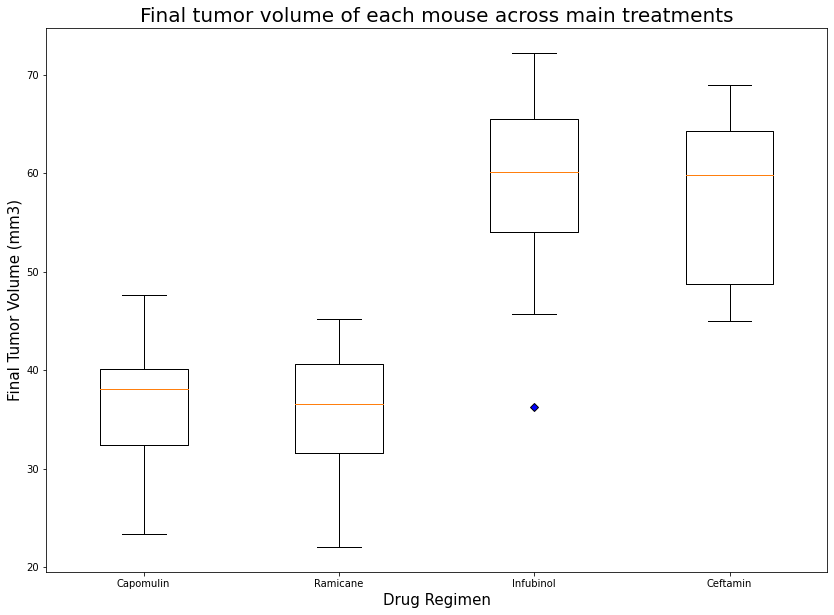

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_diamond = dict(markerfacecolor='b', marker='D')
fig1, ax1 = plt.subplots(figsize=(14, 10))
ax1.set_title("Final tumor volume of each mouse across main treatments", fontsize=20)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=15)
ax1.set_xlabel("Drug Regimen", fontsize=15)
ax1.boxplot(tumorvols, labels=treatments, flierprops=blue_diamond)

plt.show()

## Line and Scatter Plots

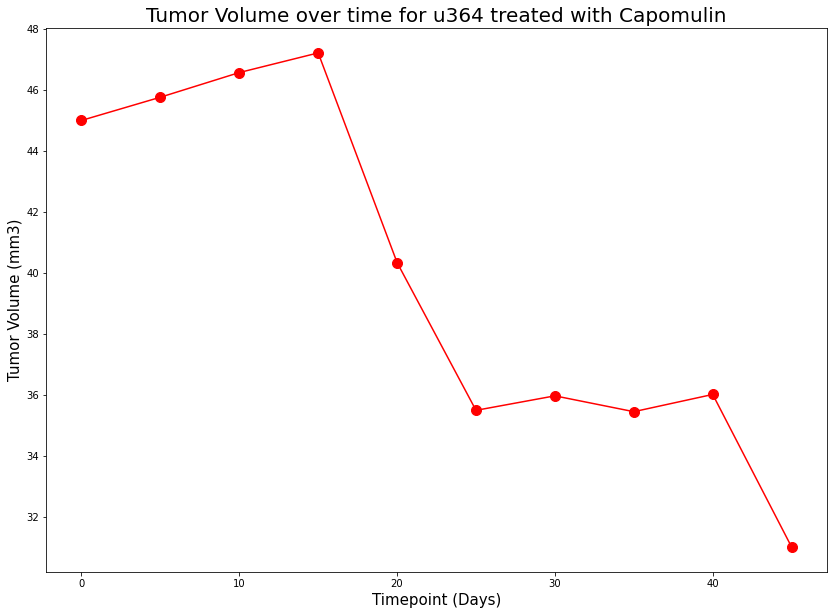

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capline = pymaceuticals_clean_df.loc[pymaceuticals_clean_df["Mouse ID"] == "u364"]

x_axis = capline["Timepoint"]
y_axis = capline["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(14, 10))
plt.title("Tumor Volume over time for u364 treated with Capomulin",fontsize =20)
plt.plot(x_axis, y_axis, markersize=10, marker="o",color="r")
plt.xlabel('Timepoint (Days)',fontsize =15)
plt.ylabel('Tumor Volume (mm3)',fontsize =15)
plt.show()

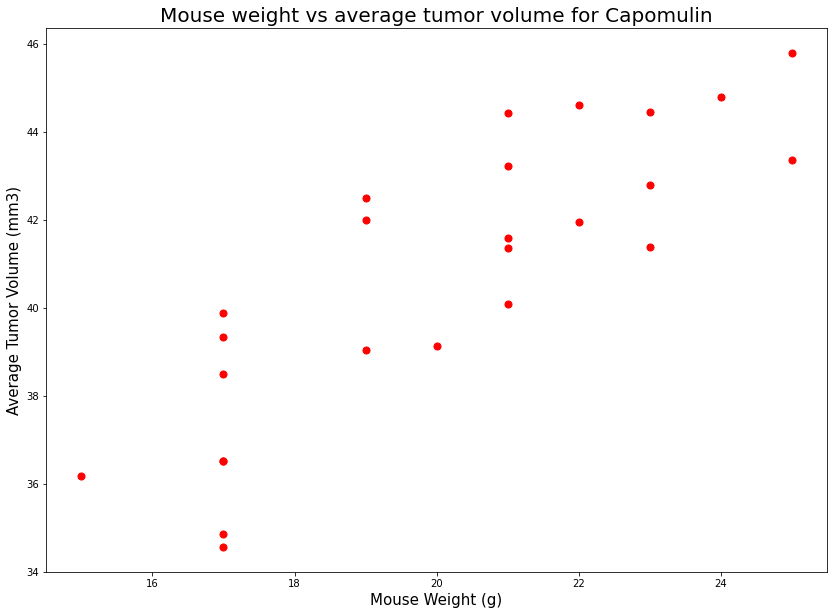

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = (pymaceuticals_clean_df.loc[pymaceuticals_clean_df["Drug Regimen"] == "Capomulin"]).groupby(["Mouse ID"])
weight = capomulin_df["Weight (g)"].mean()

avetumorvolume = capomulin_df["Tumor Volume (mm3)"].mean()

fig1, ax1 = plt.subplots(figsize=(14, 10))
plt.title("Mouse weight vs average tumor volume for Capomulin",fontsize =20)
plt.scatter(weight, avetumorvolume, s=50,color="r")
plt.xlabel('Mouse Weight (g)',fontsize =15)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =15)
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

# Perform a linear regression on mouse weight versus average tumor volume for the Capomulin regimen
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(weight, avetumorvolume)

In [19]:
# Create equation of line to calculate predicted average tumor volume
cap_fit = cap_slope * weight + cap_int

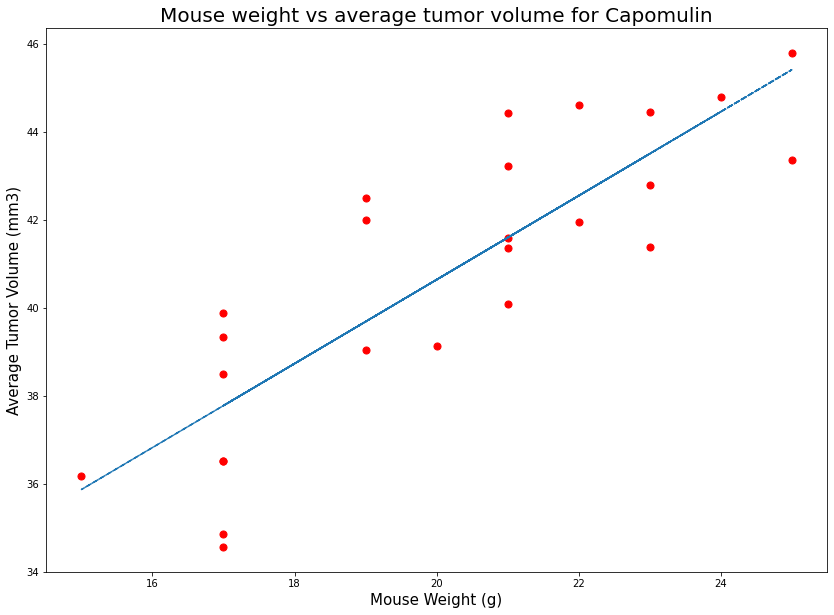

The line equation is y = 0.95x + 21.55.
The correlation coefficient is 0.8419363424694718.
The coefficient of determination (r-squared) is 0.7088568047708717.


In [20]:
fig1, ax1 = plt.subplots(figsize=(14, 10))
plt.title("Mouse weight vs average tumor volume for Capomulin",fontsize =20)
line_eq = "y = " + str(round(cap_slope,2)) + "x + " + str(round(cap_int,2))
plt.scatter(weight, avetumorvolume, s=50,color="r")
plt.plot(weight, cap_fit, "--")
plt.xlabel('Mouse Weight (g)',fontsize =15)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =15)
plt.show()
print(f"The line equation is {line_eq}.")
print(f"The correlation coefficient is {cap_r}.")
print(f"The coefficient of determination (r-squared) is {cap_r**2}.")